In [85]:
# Import the required  library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [86]:
# Reading and preprocess the data
housing_df = pd.read_excel("DS - Assignment Part 1 data set.xlsx")

In [87]:
housing_df.shape

(414, 9)

In [88]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 9 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Transaction date                          414 non-null    float64
 1   House Age                                 414 non-null    float64
 2   Distance from nearest Metro station (km)  414 non-null    float64
 3   Number of convenience stores              414 non-null    int64  
 4   latitude                                  414 non-null    float64
 5   longitude                                 414 non-null    float64
 6   Number of bedrooms                        414 non-null    int64  
 7   House size (sqft)                         414 non-null    int64  
 8   House price of unit area                  414 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 29.2 KB


In [89]:
# No any missing values and object Dtype observed in above dataframe hence No need to preprocess the Data further

In [90]:
housing_df.describe()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,1.987923,931.475845,37.980193
std,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,0.818875,348.910269,13.606488
min,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,1.000000,402.000000,7.600000
25%,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,1.000000,548.000000,27.700000
50%,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,2.000000,975.000000,38.450000
75%,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,3.000000,1234.750000,46.600000
max,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,3.000000,1500.000000,117.500000


In [91]:
housing_df.columns

Index(['Transaction date', 'House Age',
       'Distance from nearest Metro station (km)',
       'Number of convenience stores', 'latitude', 'longitude',
       'Number of bedrooms', 'House size (sqft)', 'House price of unit area'],
      dtype='object')

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


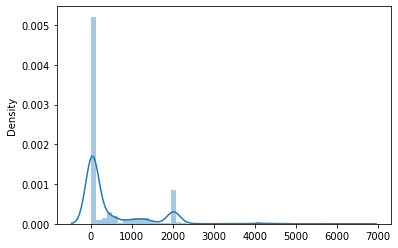

In [92]:
# Exploratory Data Analysis
sns.distplot(housing_df)

In [93]:
# As per Grapgh it seems that data points are not normally distributed hence itdoes not follow Gassian Curve and right Screw

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


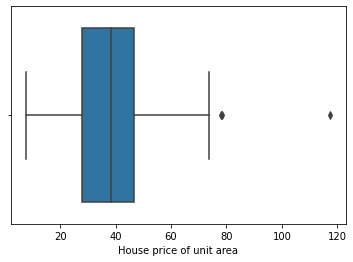

In [94]:
sns.boxplot(housing_df['House price of unit area'])

In [95]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 =  np.percentile(datacolumn,[25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q1 + (1.5*IQR)
    return lower_range , upper_range

In [96]:
l,u = outlier_treatment(housing_df['House price of unit area'])

In [97]:
l

-0.6500000000000021

In [98]:
u

56.05

In [99]:
housing_df.drop((housing_df[(housing_df['House price of unit area'] > u) | (housing_df['House price of unit area'] < l)]).index,inplace=True)

<Figure size 720x720 with 0 Axes>

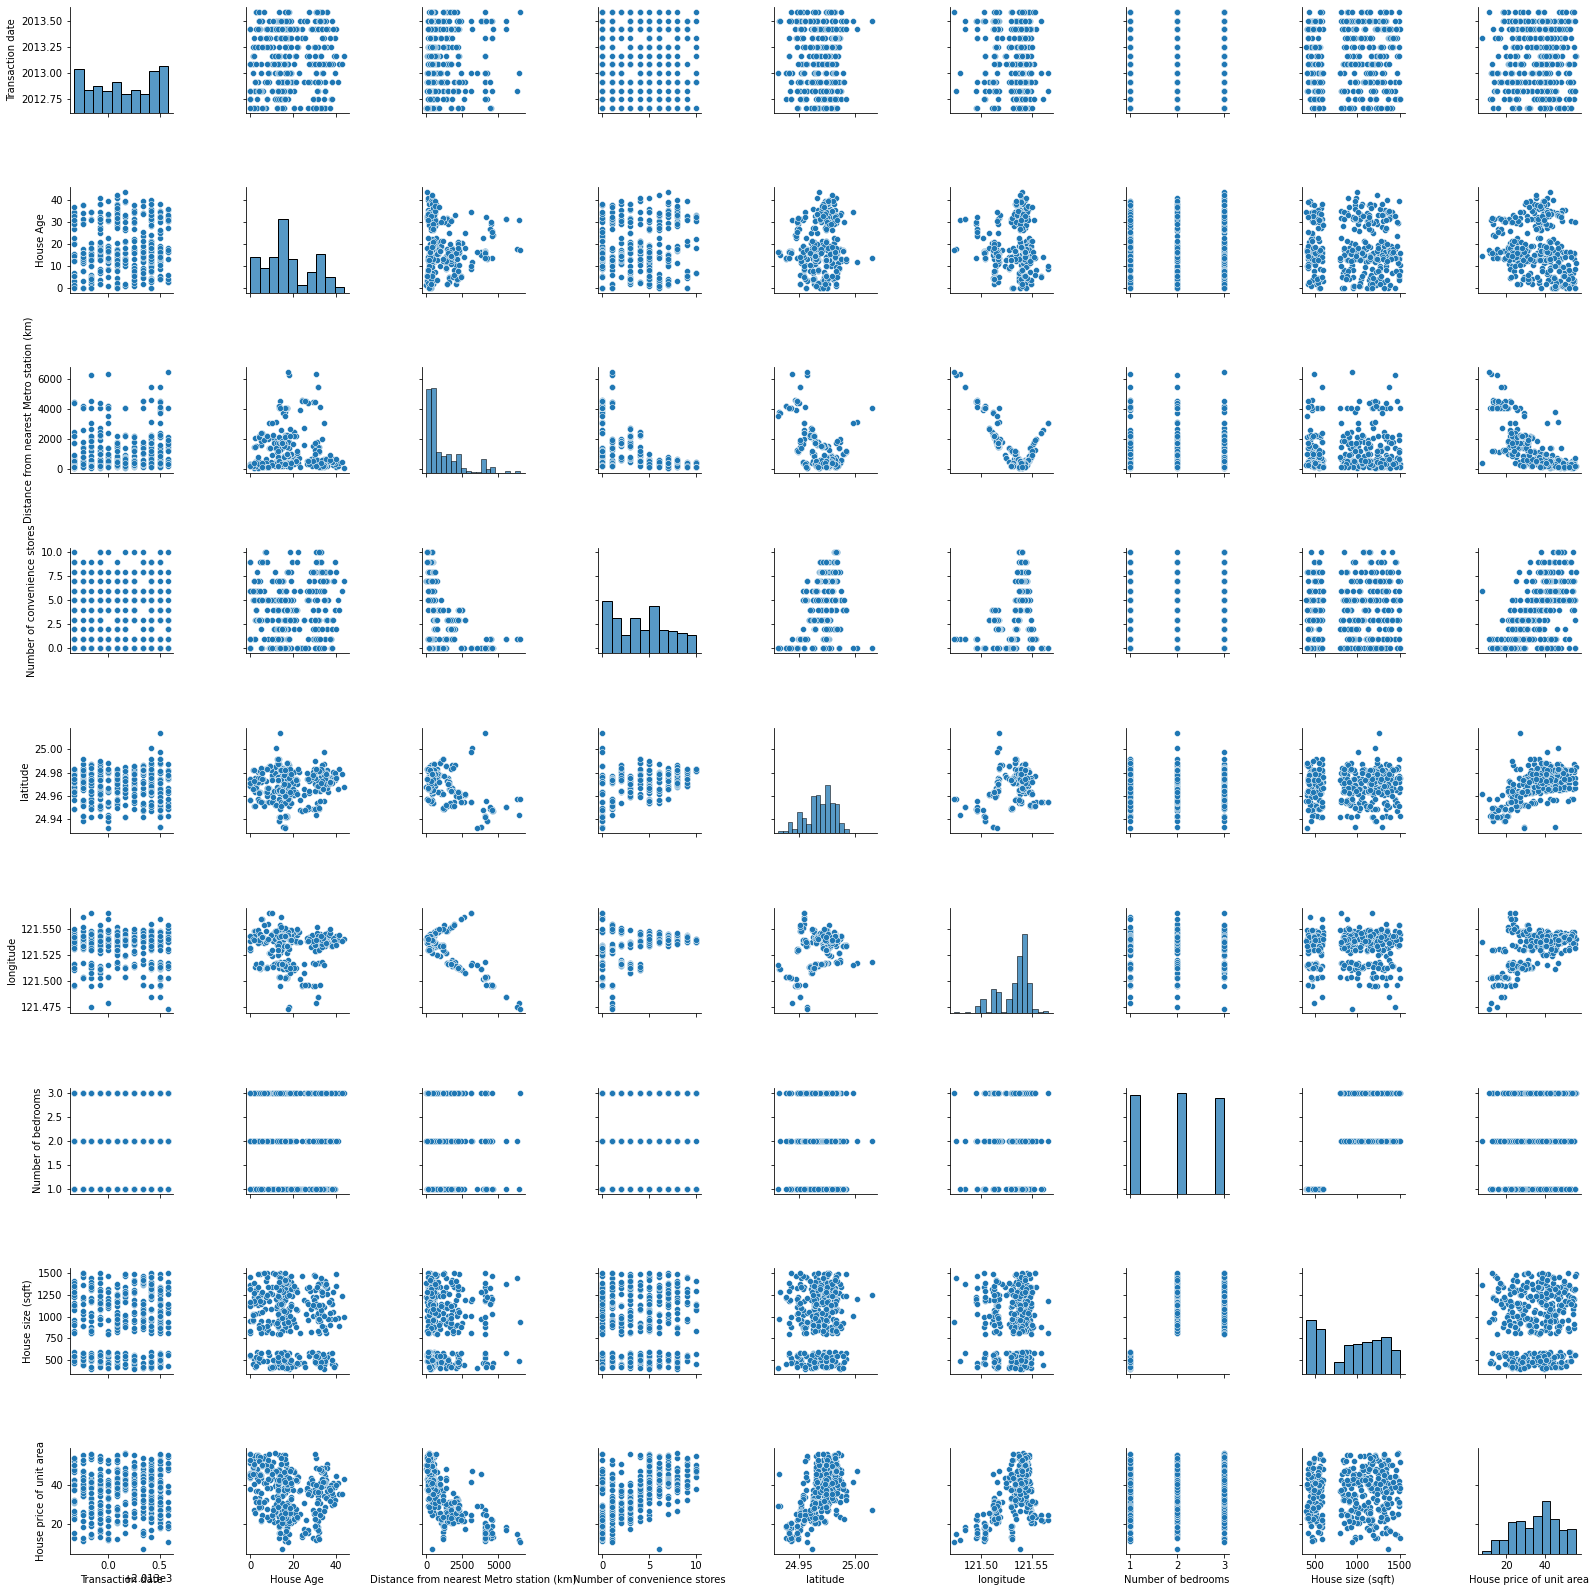

In [100]:
# Bivariate Analysis
plt.figure(figsize=(10, 10))
sns.pairplot(housing_df)
plt.show()

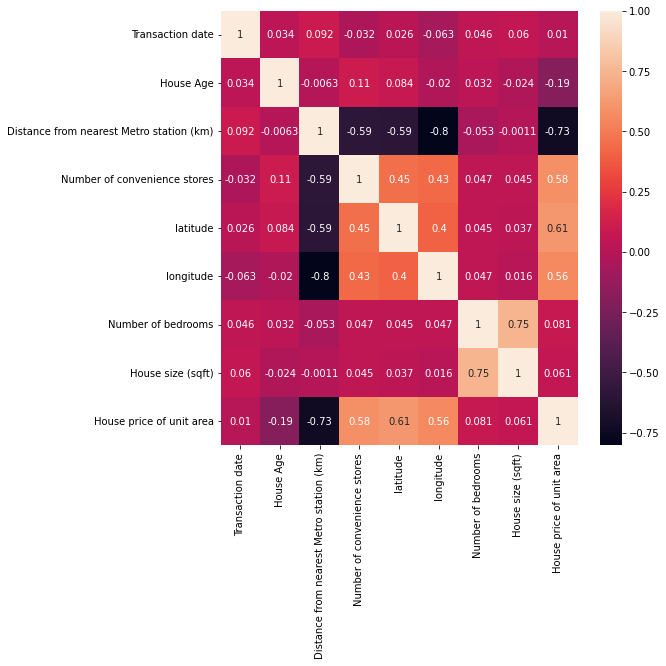

In [101]:
# Check features co relation to drop unanted features before model building
plt.figure(figsize = (8,8))
sns.heatmap(housing_df.corr() , annot=True)

In [102]:
# from heatmap we can see that feature - "Distance fron nearest metro station" must be dropped as it negatively corelated with target variable

In [103]:
#housing_df.drop(['Distance from nearest Metro station (km)'],axis=1,inplace=True)

In [104]:
housing_df

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1
...,...,...,...,...,...,...,...,...,...
408,2013.416667,18.5,2175.74400,3,24.96330,121.51243,1,477,28.1
409,2013.000000,13.7,4082.01500,0,24.94155,121.50381,3,803,15.4
410,2012.666667,5.6,90.45606,9,24.97433,121.54310,2,1278,50.0
411,2013.250000,18.8,390.96960,7,24.97923,121.53986,1,503,40.6


In [105]:
# Let's fit Logistic Regression model to check the accuracy
X = housing_df.iloc[:,0:8].values
y = housing_df.iloc[:,[8]].values

In [106]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_le = le.fit_transform(y)

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_le, test_size = 0.2, random_state = 12)

In [108]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(304, 8)
(77, 8)
(304,)
(77,)


In [109]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [110]:
X_train_scaled = ss.fit_transform(X_train)

In [111]:
X_test_scaled = ss.fit_transform(X_test)

In [112]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()

In [113]:
lr_model.fit(X_train_scaled,y_train)

LinearRegression()

In [114]:
y_preds = lr_model.predict(X_test_scaled)

In [115]:
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score,classification_report
A = r2_score(y_test,y_preds)

In [116]:
D = np.sqrt(mean_squared_error(y_test,y_preds))

Text(0, 0.5, 'y_preds')

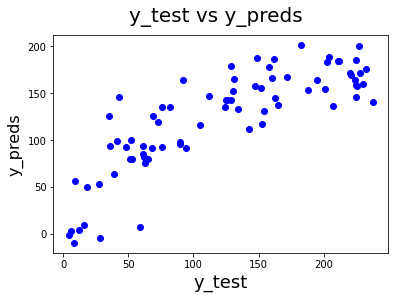

In [117]:
#VISUALIZE THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_preds, c = 'blue')
fig.suptitle('y_test vs y_preds', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_preds', fontsize=16)  


In [118]:
# Let's try with Random Forest Model to predict Housing price

In [119]:

from sklearn.ensemble import RandomForestRegressor
 
model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train_scaled, y_train)
y_pred = model_RFR.predict(X_test_scaled)

In [120]:
B = r2_score(y_test,y_pred)

In [121]:
E = np.sqrt(mean_squared_error(y_test,y_pred))

Text(0, 0.5, 'y_pred')

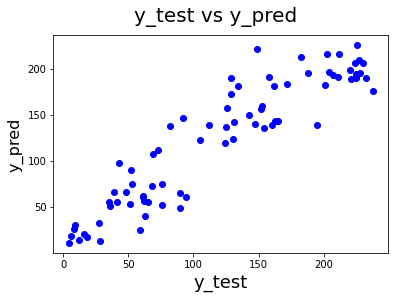

In [122]:
#EVALUATION OF THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred, c = 'blue')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  


In [123]:
from sklearn.svm import SVC
SVM = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
SVM.fit(X_train_scaled, y_train)

SVC(gamma=0.1, random_state=0)

In [124]:
y_preds1 = SVM.predict(X_test_scaled)

In [125]:
C = r2_score(y_test,y_preds1)

In [126]:
F = np.sqrt(mean_squared_error(y_test,y_preds1))

Text(0, 0.5, 'y_preds1')

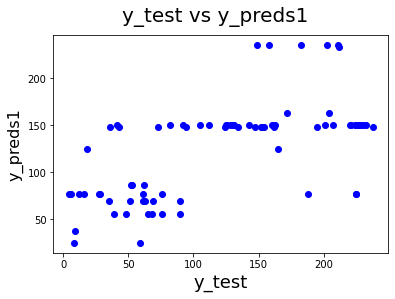

In [127]:
# VISUALIZE THE MODEL
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_preds1, c = 'blue')
fig.suptitle('y_test vs y_preds1', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_preds1', fontsize=16)  


In [128]:
compare_model = pd.DataFrame(data= [[A,B,C,D,E,F]], columns = ['A','B','C','D','E','F'])

In [129]:
compare_model.rename(columns={"A":'R2_score Lr Model',"B":'R2_score RF model',"C":'R2_score SVM model',
                              "D":'Mean_squared_error Lr model',"E":'Mean_squared_error RF model',"F" :'Mean_squared_error SVM model'})

,R2_score Lr Model,R2_score RF model,R2_score SVM model,Mean_squared_error Lr model,Mean_squared_error RF model,Mean_squared_error SVM model
0,0.672687,0.851693,0.381114,41.419687,27.880909,56.954869


In [132]:
# INFERENCE
# Hence, Random Forest Classifier works Good for Predicting the Housing Price Accurately As R2_SCORE achieved 85.16% also MSE is 27.88..
# As higher R2 score and Lower Error Shows good fit model to the said proble

In [133]:
# Thank You End of Project